# Ultimate Take Home Challenge

## Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.
Part 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
import sklearn

import seaborn as sns
import json
from pandas.io.json import json_normalize
#% matplotlib inline
import datetime

In [2]:
logins=pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
login = pd.Series(logins, index=logins.login_time)

In [5]:
quarter = login.resample('15T').count()
hourly = login.resample('60T').count()
daily =  login.resample('D').count()
weekly = login.resample('W').count()
monthly =  login.resample('M').count()

In [6]:
f, axs = plt.subplots(figsize=(15,15))
subplots_adjust(left=None, bottom=None, right=None, top=1,
                wspace=None, hspace=None)
plt.subplot(5,1,1)
plt.plot(quarter)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('15 min time interval')

plt.subplot(5,1,2)
plt.plot(hourly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Hourly time interval')


plt.subplot(5,1,3)
plt.plot(daily)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Daily time interval')


plt.subplot(5,1,4)
plt.plot(weekly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Weekly time interval')


plt.subplot(5,1,5)
plt.plot(monthly)
plt.ylabel('frequency')
plt.xlabel('login time')
plt.title('Monthly time interval')
plt.figure(figsize=(15,7))


In [7]:
#reorder/index logins
logins.sort_values('login_time')
logins.reset_index(drop=True)

#15 minute window
range_15 = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
logins_15 = pd.Series(np.zeros(len(range_15)), index=range_15)

In [8]:
#catagorize login times by 15 minute window
p = 0 
for i in range(len(logins)):
    start = logins_15.index[p]
    end = logins_15.index[p+1]
    t = logins['login_time'][i]
    
    if start < t < end:
        logins_15[p] = logins_15[p] + 1
    else:
        #move to next 15 minute slot
        while (end < t): 
            p = p + 1 
            start = logins_15.index[p] 
            end = logins_15.index[p+1]
        logins_15[p] = logins_15[p] + 1

print(logins_15.head(10))
print(logins_15.shape)

1970-01-01 20:00:00     1.0
1970-01-01 20:15:00     6.0
1970-01-01 20:30:00     2.0
1970-01-01 20:45:00    15.0
1970-01-01 21:00:00     0.0
1970-01-01 21:15:00     5.0
1970-01-01 21:30:00     0.0
1970-01-01 21:45:00     3.0
1970-01-01 22:00:00     9.0
1970-01-01 22:15:00     9.0
Freq: 15T, dtype: float64
(9789,)


In [9]:
#create dataframe
df = pd.DataFrame(logins_15)
df.columns=['count']
df['day_of_week'] = df.index.map(lambda x: x.dayofweek)

In [10]:
#average login for days of the week.
weekdays = df.groupby('day_of_week').mean()
weekdays.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(weekdays)

               count
Monday      6.216749
Tuesday     6.898065
Wednesday   7.639881
Thursday    8.814706
Friday     10.520833
Saturday   13.506250
Sunday     12.626389


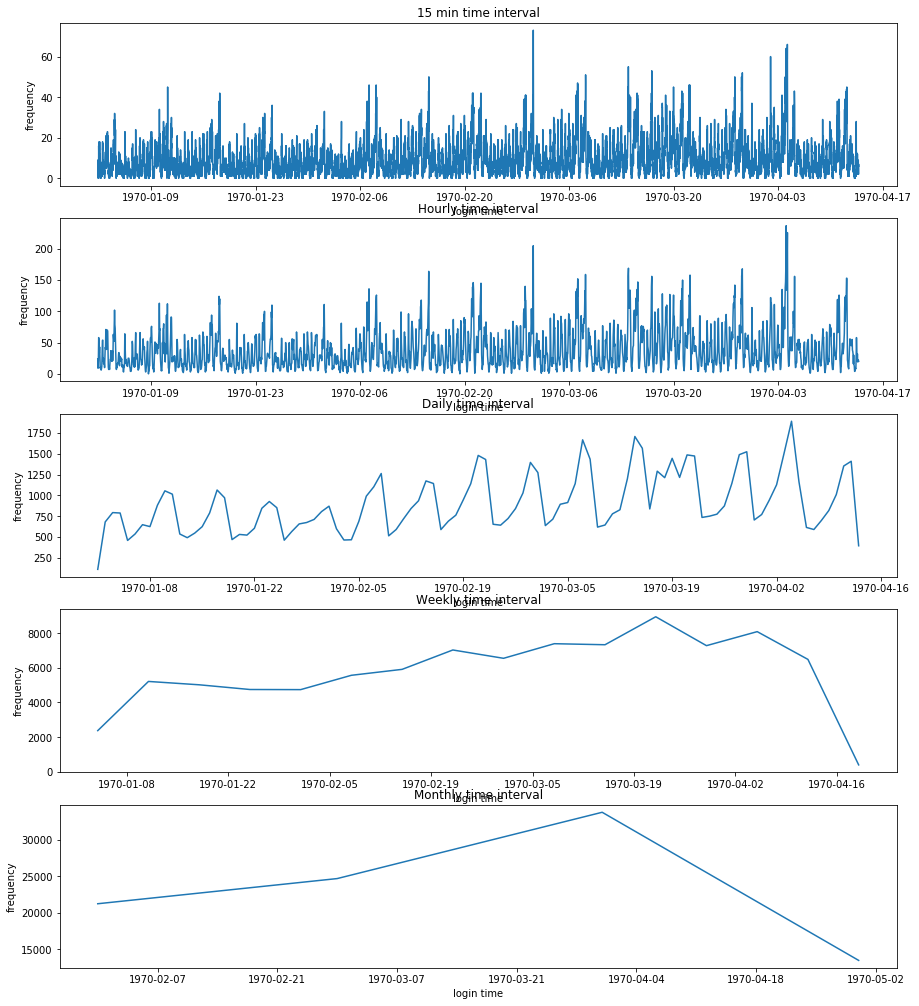

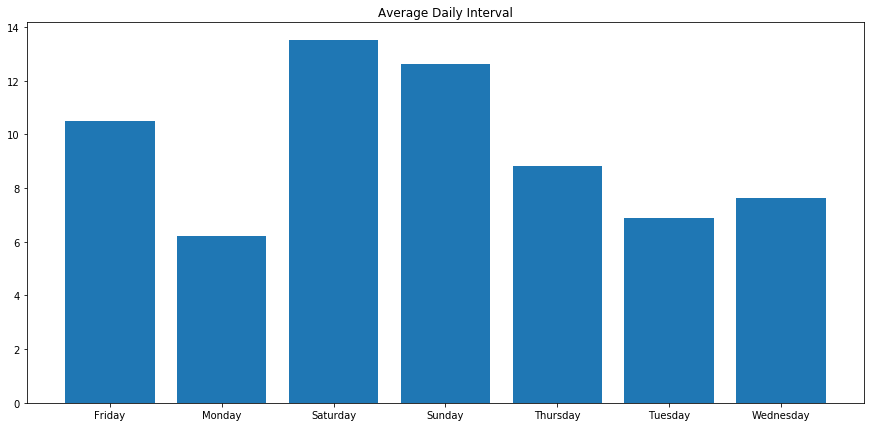

In [11]:
plt.title('Average Daily Interval')
plt.bar(weekdays.index, weekdays['count'])
plt.show()

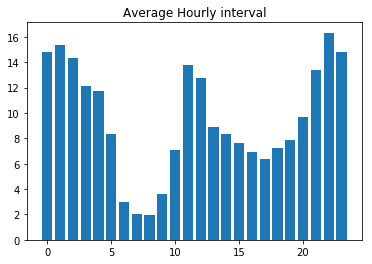

,count,day_of_week
hour,,
0,14.821078,3.029412
1,15.370098,3.029412
2,14.303922,3.029412
3,12.149510,3.029412
4,11.759804,3.029412


In [12]:
df['hour']= df.index.map(lambda x: x.hour)
df.head()

hours = df.groupby('hour').mean()

plt.title('Average Hourly interval')
plt.bar(hours.index, hours['count'])
plt.show()
hours.head()

* On average there appears to be a frequency of less than 50 logins at intervals of 15 minutes. As seen on the daily time chart, it appears frequency of logins increase over a few days and decrease again in regular intervals.
Looking at the montly chart, login frequency peaked end of March before significanly decreasing.

* It appears from the average hourly login that the most popular time of usuage is at 11pm till 3 am, with another peak at 11 am. Friday through Sunday are the most popular days of the week.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
* What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
* Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
 * a. how you will implement the experiment
 * b. what statistical test(s) you will conduct to verify the significance of the
observation
 * c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

A key measure of success in the experiment to encourage driver partners to serve in both cities by eliminating fees would be to measure the number of partner drivers. A paired t-test can be used to determine if there was an impact (as long as there are 30 data points in the set). The number of partner drivers would be compared before and after the fees were eliminated. An alternative test would be to do a two sample t-test on the mean number of trips before and after the fees were eliminated. The null hypothesis for the test would be that the two are equal. Based off the results from either of the two t-tests I would either recommend or not recommend continuing the fee reimbusement program.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
* Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
* Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
* Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm rider retention (again, a few sentences will suffice).

Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [13]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [14]:
Data = pd.DataFrame(json.load((open('ultimate_data_challenge.json'))))
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [15]:
Data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
#Convert variables to date time objects
Data['last_trip_date'] = pd.to_datetime(Data['last_trip_date'])
Data['signup_date'] = pd.to_datetime(Data['signup_date'])

Data.loc[Data['last_trip_date'] >= '2014-06-01', 'active'] = 1
Data.loc[Data['last_trip_date'] < '2014-06-01', 'active'] = 0

Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [18]:
#Fill missing values with averages
Data.avg_rating_by_driver.fillna(Data.avg_rating_by_driver.mean(), inplace=True)
Data.avg_rating_of_driver.fillna(Data.avg_rating_of_driver.mean(), inplace=True)

In [19]:
Data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [20]:
#Fill missing phone data with iphone
Data['phone'].fillna('iPhone', inplace=True) 

In [21]:
#No missing values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 4.6+ MB


In [22]:
#Reset index
Data.reset_index(inplace=True)

In [23]:
Data.describe()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.376080
std,14433.901067,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,0.484405
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,24999.500000,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,37499.250000,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.000000
max,49999.000000,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [24]:
Data.head()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [25]:
#Create dummy variables for strings
city = pd.get_dummies(Data.city)
Data = Data.join(city)

phone = pd.get_dummies(Data.phone)
Data = Data.join(phone)

In [26]:
dummies = pd.get_dummies(Data['ultimate_black_user']).rename(columns=lambda x: 'ultimate_black_user_' + str(x))
Data = pd.concat([Data, dummies], axis=1)
Data = Data.drop(['ultimate_black_user'], axis=1)
Data.head()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [27]:
active_users = Data.active.mean()
print("Active users in the last 30 days: " + str(active_users))

Active users in the last 30 days: 0.37608


In [28]:
#Drop all category dupes
Data.drop('last_trip_date', axis=1, inplace=True)

In [29]:
Data.drop(['signup_date'],axis = 1, inplace=True)

In [30]:
Data.drop(['phone'],axis = 1, inplace=True)

In [31]:
Data.drop(['city'],axis = 1, inplace=True)

In [32]:
Data.drop(['index'],axis = 1, inplace=True)

In [33]:
Data.drop(['surge_pct'],axis = 1, inplace=True)

In [34]:
Data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,14,82.4,0.0,0,0,1,1,0,1,0


In [35]:
Data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,weekday_pct,active,Astapor,King's Landing,Winterfell,Android,iPhone,ultimate_black_user_False,ultimate_black_user_True
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,2.278200,60.926084,0.376080,0.330680,0.202600,0.466720,0.300440,0.699560,0.62292,0.37708
std,5.707357,0.445753,0.564977,0.222336,3.792684,37.081503,0.484405,0.470463,0.401941,0.498896,0.458454,0.458454,0.48466,0.48466
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,3.880000,5.000000,4.700000,1.000000,1.000000,66.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.00000
75%,6.940000,5.000000,5.000000,1.050000,3.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.00000
max,160.960000,5.000000,5.000000,8.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [36]:
#Variables for model
X = Data.drop(['active'], axis=1)
y = Data['active']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
#Decision Tree Classifier with criterion gini index
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [39]:
#Prediction for Decision Tree classifier with criterion as gini index
y_pred = clf_gini.predict(X_test)

In [40]:
#features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge', 'city' ,'phone', 
#            'trips_in_first_30_days', 'ultimate_black_user','weekday_pct' ]
features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver', 'avg_surge','trips_in_first_30_days', 
            'ultimate_black_user','weekday_pct','Astapor','Kings_Landing','Winterfell','Android','iPhone',
            'ultimate_black_user_False','ultimate_black_user_True']

In [41]:
gini_importances = clf_gini.feature_importances_
indices = np.argsort(gini_importances)[::-1]


# Print the feature ranking
print("Feature ranking:")


for i, val in enumerate(clf_gini.feature_importances_):
    print("{:20}{:3f}".format(features[i], val))

Feature ranking:
avg_dist            0.000000
avg_rating_by_driver0.498255
avg_rating_of_driver0.000000
avg_surge           0.069918
trips_in_first_30_days0.012600
ultimate_black_user 0.016383
weekday_pct         0.000000
Astapor             0.211024
Kings_Landing       0.000000
Winterfell          0.044708
Android             0.076012
iPhone              0.063408
ultimate_black_user_False0.007692


In [42]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
print('Confusion matrix for Decision Tree Classifier with criterion gini index')
print(confusion_matrix(y_test, y_pred))

print('Test accuracy: '+str(accuracy_score(y_test, y_pred)))

Confusion matrix for Decision Tree Classifier with criterion gini index
[[5437  829]
 [1602 2132]]
Test accuracy: 0.7569


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82      6266
        1.0       0.72      0.57      0.64      3734

avg / total       0.75      0.76      0.75     10000



In [44]:
#Import models
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
#Variables for model
X = Data.drop(['active'], axis=1)
y = Data['active']

In [46]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
#Random Over-Sampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(0.0, 25016), (1.0, 14984)]
[(0.0, 25016), (1.0, 25016)]


In [48]:
#Logistic Regression
clf_log = LogisticRegression()
clf_log.fit(X_resampled, y_resampled)

y_pred_log = clf_log.predict(X_test)

print('Confusion matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_log))

print('Test accuracy: '+str(accuracy_score(y_test, y_pred_log)))

Confusion matrix for Logistic Regression
[[4474 1706]
 [1283 2537]]
Test accuracy: 0.7011


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

             precision    recall  f1-score   support

        0.0       0.78      0.72      0.75      6180
        1.0       0.60      0.66      0.63      3820

avg / total       0.71      0.70      0.70     10000



In [50]:
#Variables for model
X = Data.drop(['active'], axis=1)
y = Data['active']

In [51]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(0.0, 24958), (1.0, 15042)]
[(0.0, 24958), (1.0, 24958)]


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

rf_result = rf.fit(X_resampled,y_resampled)

rf_pred = rf_result.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.7389

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

[[4983 1255]
 [1356 2406]]
             precision    recall  f1-score   support

        0.0       0.79      0.80      0.79      6238
        1.0       0.66      0.64      0.65      3762

avg / total       0.74      0.74      0.74     10000



Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

* The proportion of active users retained and active in the last 30 days was 37.608 percent.

* I built a decision tree classifier model along with Random forest and logistic regression classifiers. I wanted to determine feature importance and also thought a binary classification model would work best in this scenario. The best score was from the decision tree model with an accurary score of 76 percent and a F1 score of 75 percent. Random forest performed the next best with an accuracy and F1 score of 74 percent. Logistic regression came in last with a accuracy of 70 percent and F1 score of 71 percent.

* The average rating of the driver was the highest determining feature at 50 percent for being active in the last 30 days. The city of Astapor was the second more important feature at 21 percent. Android users were the third most important feature at 8 percent. 

* It would be interesting for the client to look into why there is an overwhelming majority of iphone users compared to android users using the service. Maybe android phones are not compatible or there is a glitch in the service? It would also be interesting to figure our why Astapor users are so loyal, maybe this could be used to increase ridership in other cities.